<a href="https://colab.research.google.com/github/Srivashinie/Artificial-Intelligence/blob/main/Artificial-Intelligence%20/Robot%20Navigation/Robot_Navigation_with_Q_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Robot Navigation with Q-Learning**


Robby the Robot learns to navigate a grid world, pick up cans, and avoid walls using Q-learning. Robby's environment is a 10x10 grid with walls surrounding it. Some grid squares contain soda cans. Robby has sensors for the current, north, south, east, and west locations, each returning the value of Empty, Can, or Wall. Robby can take five actions: Move-North, Move-South, Move-East, Move-West, and Pick-Up-Can.



**Implementation:**


* The implementation includes a simulator for Robby, who learns to navigate a grid world using Q-learning. Robby's actions are defined by a class that represents the robot and includes methods for performing actions, receiving sensor input, and updating its state based on the grid environment. The grid is defined by another class that randomly initializes walls, empty cells, and cans.
* The Q-learning algorithm is implemented with a Q-matrix that maps states to actions, initialized to zeros. The algorithm updates the Q-matrix based on the rewards received and the next state observed. Actions are chosen using ε-greedy action selection to balance exploration and exploitation.
* During each learning episode, Robby starts in a random grid square with a random distribution of cans. At each time step, Robby observes the current state, chooses an action, performs the action, receives a reward, observes the new state, and updates the Q-matrix. After each episode, a new distribution of cans is generated, and Robby is placed in a random grid square to start the next episode.
* The training process involves running N episodes, each consisting of M steps. The total sum of rewards per episode is plotted every 100 episodes to visualize Robby's learning progress. This plot shows how Robby's cumulative reward increases over episodes as he learns to navigate the grid and pick up cans more efficiently.
* After training, N test episodes are run using the trained Q-matrix with ε = 0.1. For each test episode, a new distribution of cans is generated, and Robby is placed in a random grid square. The average and standard deviation of the sum of rewards per episode are calculated to evaluate Robby's performance in new environments after training.



















Number of episodes: 5000, Steps: 200, Learning rate: 0.2, gamma: 0.9, epsilon: 0.1
Test-Average: 47.1152
Test-Standard-Deviation: 131.4802400703619


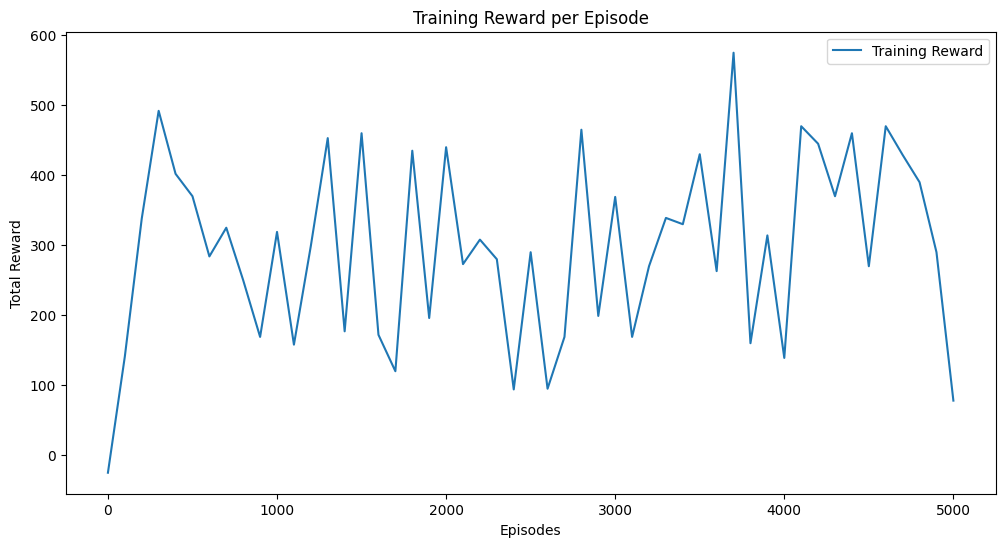

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

num_of_episodes = 5000 #episodes for training
steps = 200 #steps per episode
learning_rate = 0.2
gamma = 0.9
epsilon = 0.1

#indicators for wall,can,empty cell
WALL = 1
EMPTY = 2
CAN = 0
NULL = -1

#define a grid and initialise with values
class GridDefinition:
    def __init__(self):
        self.grid = np.zeros((10, 10))
        for row in range(10):
            for col in range(10):
                self.grid[row, col] = random.randint(0, 1)

    def reset(self):
        self.grid = np.zeros((10, 10))
        for row in range(10):
            for col in range(10):
                self.grid[row, col] = random.randint(0, 1)

#define the action of the robot
class Robby:

    def __init__(self):  #initialize robby's location,grid and reward
        self.location_x_coor = random.randint(0, 9)
        self.location_y_coor = random.randint(0, 9)
        self.robby_grid = GridDefinition()
        self.reward = 0
        self.define_here = NULL
        self.define_north = NULL
        self.define_south = NULL
        self.define_west = NULL
        self.define_east = NULL

    def predict_state(self): #update predictions based on current state
        if self.robby_grid.grid[self.location_x_coor, self.location_y_coor]:
            self.define_here = CAN
        else:
            self.define_here = EMPTY

        if self.location_x_coor == 0:
            self.define_north = WALL
        elif self.robby_grid.grid[self.location_x_coor - 1, self.location_y_coor]:
            self.define_north = CAN
        else:
            self.define_north = EMPTY

        if self.location_x_coor == 9:
            self.define_south = WALL
        elif self.robby_grid.grid[self.location_x_coor + 1, self.location_y_coor]:
            self.define_south = CAN
        else:
            self.define_south = EMPTY

        if self.location_y_coor == 0:
            self.define_west = WALL
        elif self.robby_grid.grid[self.location_x_coor, self.location_y_coor - 1]:
            self.define_west = CAN
        else:
            self.define_west = EMPTY

        if self.location_y_coor == 9:
            self.define_east = WALL
        elif self.robby_grid.grid[self.location_x_coor, self.location_y_coor + 1]:
            self.define_east = CAN
        else:
            self.define_east = EMPTY

    def set_robby_location(self, x_val_coor, y_val_coor): #set robby's location
        self.location_x_coor = x_val_coor
        self.location_y_coor = y_val_coor

    def get_q_matrix_State(self):  #get state index for Q matrix
        return ((3 ** 0) * self.define_here + (3 ** 1) * self.define_east +
                (3 ** 2) * self.define_west + (3 ** 3) * self.define_south + (3 ** 4) * self.define_north)

    #move the robby east,west,north or south update perception value and return rewards
    def move_east(self):
        if self.location_y_coor == 9:
            self.reward -= 5
            self.predict_state()
            return -5
        else:
            self.location_y_coor += 1
            self.predict_state()
            return 0

    def move_west(self):
        if self.location_y_coor == 0:
            self.reward -= 5
            self.predict_state()
            return -5
        else:
            self.location_y_coor -= 1
            self.predict_state()
            return 0

    def move_north(self):
        if self.location_x_coor == 0:
            self.reward -= 5
            self.predict_state()
            return -5
        else:
            self.location_x_coor -= 1
            self.predict_state()
            return 0

    def move_south(self):
        if self.location_x_coor == 9:
            self.reward -= 5
            self.predict_state()
            return -5
        else:
            self.location_x_coor += 1
            self.predict_state()
            return 0

    def pickup_can(self):  #pickup grid and update values
        if self.robby_grid.grid[self.location_x_coor, self.location_y_coor]:
            self.reward += 10
            self.robby_grid.grid[self.location_x_coor, self.location_y_coor] = False
            self.predict_state()
            return 10
        else:
            self.reward -= 1
            return -1

    def do_action(self, rand):
        if rand == 0:
            return self.move_north()
        elif rand == 1:
            return self.move_south()
        elif rand == 2:
            return self.move_east()
        elif rand == 3:
            return self.move_west()
        elif rand == 4:
            return self.pickup_can()

def epsilon_greedy_action(Q_matrix, state, epsilon):  #choose action based upon the epsilon value
    if random.random() < epsilon:
        return random.randint(0, 4)
    else:
        return np.argmax(Q_matrix[state])

#implement q learning algorithm
def robby_q_learning():
    global epsilon
    Q_matrix = np.zeros((3 ** 5, 5))
    rewards = []
    print(f"Number of episodes: {num_of_episodes}, Steps: {steps}, Learning rate: {learning_rate}, gamma: {gamma}, epsilon: {epsilon}")
    for epoch in range(num_of_episodes + 1):
        robby = Robby()
        total_reward = 0
        for _ in range(steps):
            robby.predict_state()
            state = robby.get_q_matrix_State()
            action = epsilon_greedy_action(Q_matrix, state, epsilon)
            reward = robby.do_action(action)
            total_reward += reward

            #update Q matrix
            next_state = robby.get_q_matrix_State()
            Q_matrix[state, action] += learning_rate * (reward + gamma * np.max(Q_matrix[next_state]) - Q_matrix[state, action])

        rewards.append(total_reward)

        #decay epsilon every 50 episodes
        if epoch % 50 == 0 and epsilon >= 0.01:
            epsilon *= 0.95

    #testing
    test_rewards = []
    for _ in range(num_of_episodes):
        robby = Robby()
        total_test_reward = 0
        for _ in range(steps):
            robby.predict_state()
            state = robby.get_q_matrix_State()
            action = np.argmax(Q_matrix[state])
            reward = robby.do_action(action)
            total_test_reward += reward
        test_rewards.append(total_test_reward)

    #print Test-Average and Test-Standard-Deviation
    print("Test-Average:", np.mean(test_rewards))
    print("Test-Standard-Deviation:", np.std(test_rewards))

    #plotting the graph
    plt.figure(figsize=(12, 6))
    plt.plot(range(0, num_of_episodes + 1, 100), rewards[::100], label='Training Reward')
    plt.xlabel('Episodes')
    plt.ylabel('Total Reward')
    plt.title('Training Reward per Episode')
    plt.legend()
    plt.show()
robby_q_learning()
